In [1]:
import pandas as pd
import plotly.express as px
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio

In [2]:
#Constante ip

IP = '101.4.0.1'

#Dataframes

dict_capturas = dict({'china': './data/101.4.0.1 (all ips) 05-18-2022 19:22:10.csv',
                      'china_mean': './data/101.4.0.1 05-18-2022 20:19:31.csv'})

for captura in dict_capturas.keys():
    dict_capturas[captura] = pd.read_csv(dict_capturas[captura])
    dict_capturas[captura].name = captura

df_china = dict_capturas['china']
df_china_mean = dict_capturas['china_mean']

def most_frequent(List):
    return max(set(List), key = List.count)

In [4]:
#Camino de ip's

# Diccionario que en cada entrada es un ttl, y en cada una hay una lista con las ips
# que aparecieron en ese salto
dict_ips_for_every_ttl = dict()
dict_ips_for_every_ttl['ttl1'] = []

# Esto lo hago para poder iterar el df
df_china = df_china.reset_index()

row_ttl = 1
for index, row in df_china.iterrows():
    if (row['ttl'] == row_ttl):
        dict_ips_for_every_ttl['ttl'+str(row_ttl)].append(row['ip'])
    else:
        row_ttl = row['ttl']
        dict_ips_for_every_ttl['ttl'+str(row_ttl)] = []
        dict_ips_for_every_ttl['ttl'+str(row_ttl)].append(row['ip'])

most_frequent_ip = dict()
ttl_anterior = 'ttl1'
for ttl in dict_ips_for_every_ttl.keys():
    if (most_frequent(dict_ips_for_every_ttl[ttl]) == most_frequent(dict_ips_for_every_ttl[ttl_anterior]) and most_frequent(dict_ips_for_every_ttl[ttl]) == IP):
        break    
    most_frequent_ip[ttl] = most_frequent(dict_ips_for_every_ttl[ttl])
    ttl_anterior = ttl

In [15]:
#Tiempos

dict_ttl_tiempos = dict()

row_ttl = 0
for index, row in df_china.iterrows():
    if (('ttl' + str(row['ttl']) in most_frequent_ip.keys()) and row['ip'] == most_frequent_ip['ttl' + str(row['ttl'])]):
        if (row['ttl'] == row_ttl):
            dict_ttl_tiempos['ttl'+str(row_ttl)].append(row['rtt'])
        else:
            row_ttl = row['ttl']
            dict_ttl_tiempos['ttl'+str(row_ttl)] = []
            dict_ttl_tiempos['ttl'+str(row_ttl)].append(row['rtt'])

In [38]:
ttls = most_frequent_ip.keys()

tiempos = [np.mean(dict_ttl_tiempos[tiempo]) for tiempo in dict_ttl_tiempos.keys()]

for i in range(1, len(tiempos)):
    jump = tiempos[i] - tiempos[i-1]
    if jump < 0:
        j = 1
        while i - j > 0 and jump < 0:
            j += 1
            jump = tiempos[i] - tiempos[i-j]
    tiempos[i] = max(jump, 0)

varianza_de_los_tiempos = [np.var(dict_ttl_tiempos[tiempo]) for tiempo in dict_ttl_tiempos.keys()]

In [39]:
df = pd.DataFrame(list(zip(ttls, tiempos, varianza_de_los_tiempos)),
               columns =['ttls', 'tiempos', 'varianza'])

df

,ttls,tiempos,varianza
0,ttl1,67.932760,368.501887
1,ttl6,3.111208,7.687065
2,ttl7,70.466633,163.100736
3,ttl8,26.703399,109.613893
4,ttl9,76.642281,101.927330
5,ttl10,18.490968,95.370812
6,ttl11,187.690283,54.219234
7,ttl12,79.010753,114.935174
8,ttl13,266.986287,97.979687
9,ttl14,124.760914,99.752252


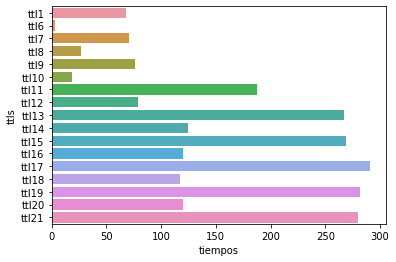

In [43]:
ax = sns.barplot(
    x= df['tiempos'], 
    y= df['ttls'],
    estimator=sum,
    ci=None,
    orient = 'h'
)
fig = ax.get_figure()